In [1]:
from kitaev import *

hi


In [2]:
N_global = 100
d_global = 2
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(mu=0 * t), v=offsite(delta=1 * t, t=t))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(mu=1 * t), v=offsite(delta=1 * t, t=t))
# var_T = np.linspace(0.2 / t, 5 / t, 100)  # What's what?
var_T = np.arange(0.02, 1.5, 0.02)
G_0_odd = []
G_0_even = []
G_pi_odd = []
G_pi_even = []

delta_amount = 1E-6
delta_positive_0 = (delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_0 = (-delta_amount * 1j) * np.eye(N_global * d_global)
delta_positive_pi = (1 + delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_pi = (-1 - delta_amount * 1j) * np.eye(N_global * d_global)

for j in tqdm(range(len(var_T))):

    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=var_T[j])
    """ eval, evec = sla.eigh(h_f)
    mod_ind, mod_num = check_modes(eval, 1, e_threshold= 1E-3)
    if mod_num != 0:
        delta_positive_pi = (eval[mod_ind[0]] - delta_amount * 1j) * np.eye(N_global * d_global)
        delta_negative_pi = (eval[mod_ind[1]] + delta_amount * 1j) * np.eye(N_global * d_global)
    else:
        delta_positive_pi = (1 + delta_amount * 1j) * np.eye(N_global * d_global)
        delta_negative_pi = (-1 - delta_amount * 1j) * np.eye(N_global * d_global)
    #print(mod_num)"""

    G_0_pos = np.array(la.inv(delta_positive_0 - h_f))
    G_0_neg = np.array(la.inv(delta_negative_0 - h_f))

    G_0_odd.append((G_0_pos - G_0_neg) / 2)
    G_0_even.append((G_0_pos + G_0_neg) / 2)

    G_pi_pos = np.array(la.inv(delta_positive_pi - h_f))
    G_pi_neg = np.array(la.inv(delta_negative_pi - h_f))
    G_pi_odd.append((G_pi_pos - G_pi_neg) / 2)
    G_pi_even.append((G_pi_pos + G_pi_neg) / 2)

100%|██████████| 74/74 [00:23<00:00,  3.21it/s]


In [3]:
"""N_global = 100
d_global = 2
h_1 = Hamiltonian(d=d_global,N=N_global,u=onsite(_mu=0*t),v=offsite(_delta=1*t, _t=t))
h_2 = Hamiltonian(d=d_global,N=N_global,u=onsite(_mu=1*t),v=offsite(_delta=1*t, _t=t))
# var_T = np.linspace(0.2 / t, 5 / t, 100)  # What's what?
var_T = np.linspace(0.02, 0.98, 96)
G_0_odd = []
G_0_even = []
G_pi_odd = []
G_pi_even = []

for j in tqdm(range(len(var_T))):
    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])
    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd.append((G_0_pos - G_0_neg)/2)
    G_0_even.append((G_0_pos + G_0_neg)/2)

    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((-1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd.append((G_pi_pos - G_pi_neg)/2)
    G_pi_even.append((G_pi_pos + G_pi_neg)/2)"""

"N_global = 100\nd_global = 2\nh_1 = Hamiltonian(d=d_global,N=N_global,u=onsite(_mu=0*t),v=offsite(_delta=1*t, _t=t))\nh_2 = Hamiltonian(d=d_global,N=N_global,u=onsite(_mu=1*t),v=offsite(_delta=1*t, _t=t))\n# var_T = np.linspace(0.2 / t, 5 / t, 100)  # What's what?\nvar_T = np.linspace(0.02, 0.98, 96)\nG_0_odd = []\nG_0_even = []\nG_pi_odd = []\nG_pi_even = []\n\nfor j in tqdm(range(len(var_T))):\n    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])\n    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_0_odd.append((G_0_pos - G_0_neg)/2)\n    G_0_even.append((G_0_pos + G_0_neg)/2)\n\n    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_pi_neg = np.array(la.inv((-1-0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_pi_odd.append((G_pi_pos - G_pi_neg)/2)\n    G_pi_even.append((G_pi_pos + G_pi_neg)/2)"

In [4]:
"""N = 100
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
chiral_operator = Hamiltonian(d,N,s_x,np.zeros((d,d))).lattice_hamiltonian()
#var_T = np.arange(0.01,1.5,0.02)
var_T = np.linspace(0.02, 0.98, 96)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
G_0_odd = []
G_0_even = []
G_pi_odd = []
G_pi_even = []

for j in tqdm(range(len(var_T))):
    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])
    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd.append((G_0_pos - G_0_neg)/2)
    G_0_even.append((G_0_pos + G_0_neg)/2)

    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((- 1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd.append((G_pi_pos - G_pi_neg)/2)
    G_pi_even.append((G_pi_pos + G_pi_neg)/2)"""

'N = 100\n#index = np.arange(0.5*N)\ntrace_cutoff = int(0.5*N)\nh_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))\nh_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))\nchiral_operator = Hamiltonian(d,N,s_x,np.zeros((d,d))).lattice_hamiltonian()\n#var_T = np.arange(0.01,1.5,0.02)\nvar_T = np.linspace(0.02, 0.98, 96)\nvar_E = np.linspace(-2,2,100)\nx, y = np.meshgrid(var_T, var_E)\nG_0_odd = []\nG_0_even = []\nG_pi_odd = []\nG_pi_even = []\n\nfor j in tqdm(range(len(var_T))):\n    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])\n    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_0_odd.append((G_0_pos - G_0_neg)/2)\n    G_0_even.append((G_0_pos + G_0_neg)/2)\n\n    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_pi_neg = np.array(la.inv((- 1-0.00000000001*1j)*np.eye(len(h_f))-h_f))\n    G_pi_odd.ap

In [5]:
"""G_0_odd = np.array(G_0_odd)
G_0_even = np.array(G_0_even)
G_pi_odd = np.array(G_pi_odd)
G_pi_even = np.array(G_pi_even)
"""
f_0_odd = [abs(G_0_odd[i][0,1]) for i in range(len(G_0_odd))]
f_0_even = [abs(G_0_even[i][0,1]) for i in range(len(G_0_even))]
f_pi_odd = [abs(G_pi_odd[i][0,1]) for i in range(len(G_pi_odd))]
f_pi_even = [abs(G_pi_even[i][0,1]) for i in range(len(G_pi_even))]
print(len(G_0_odd))

74


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


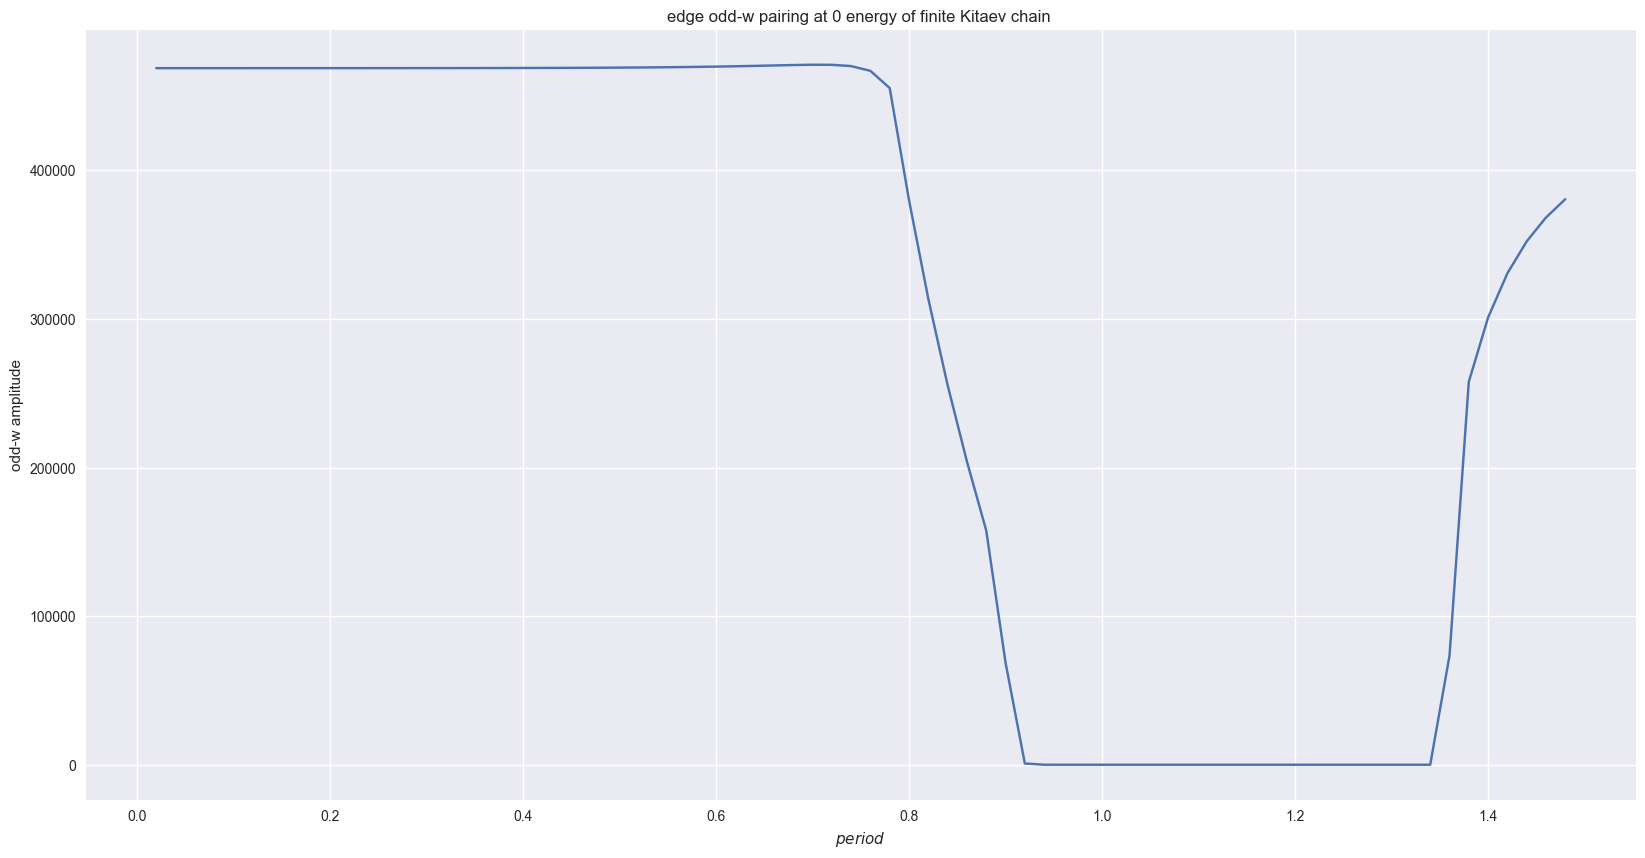

In [6]:
plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T,f_0_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


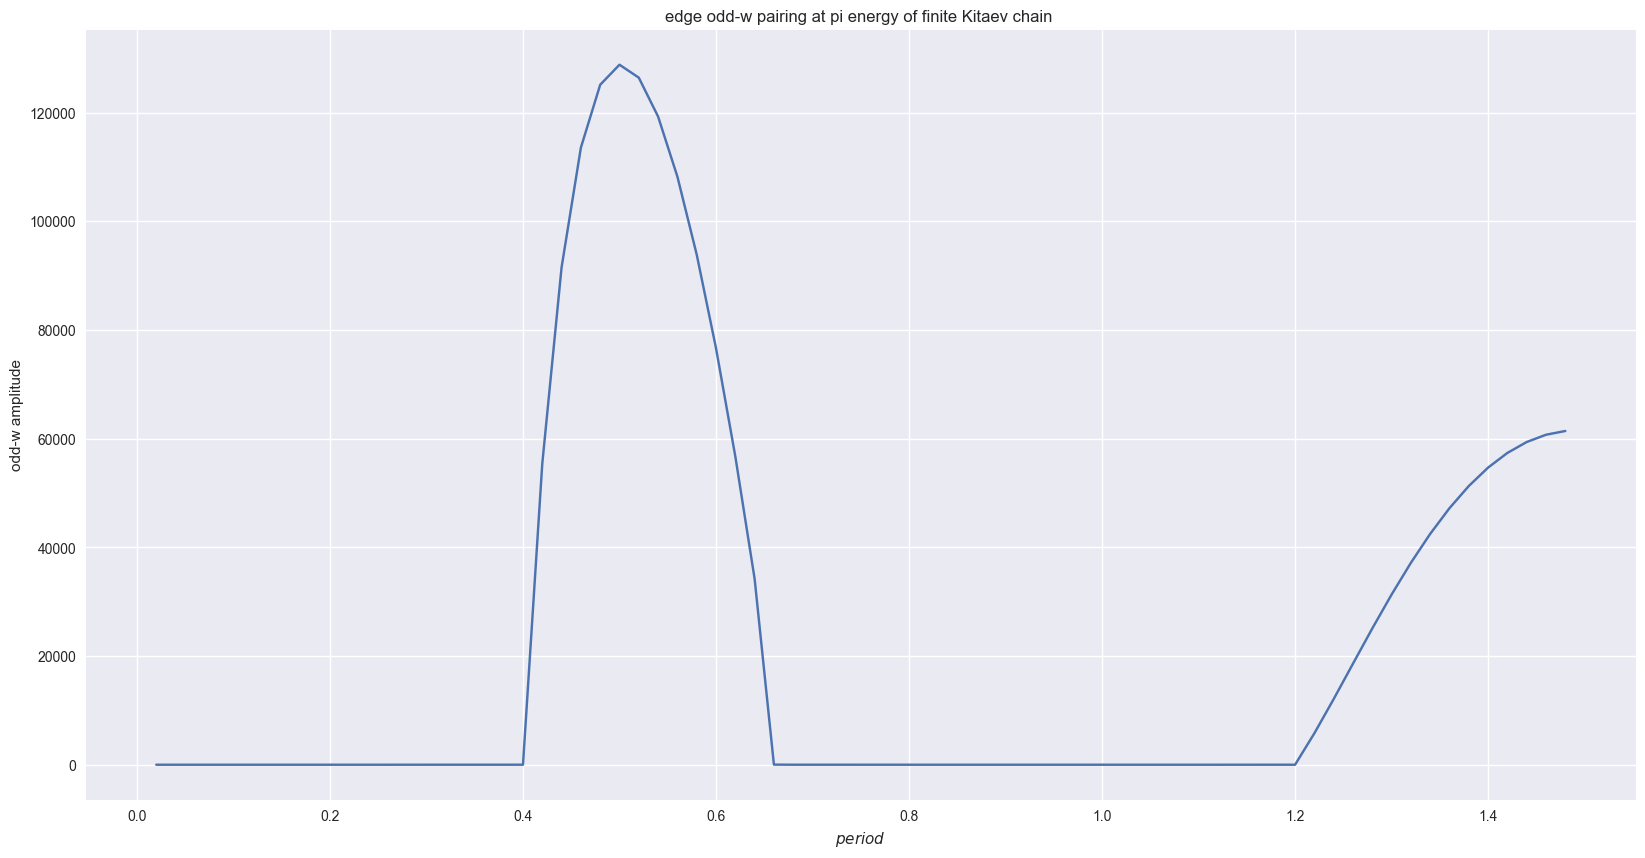

In [7]:
plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


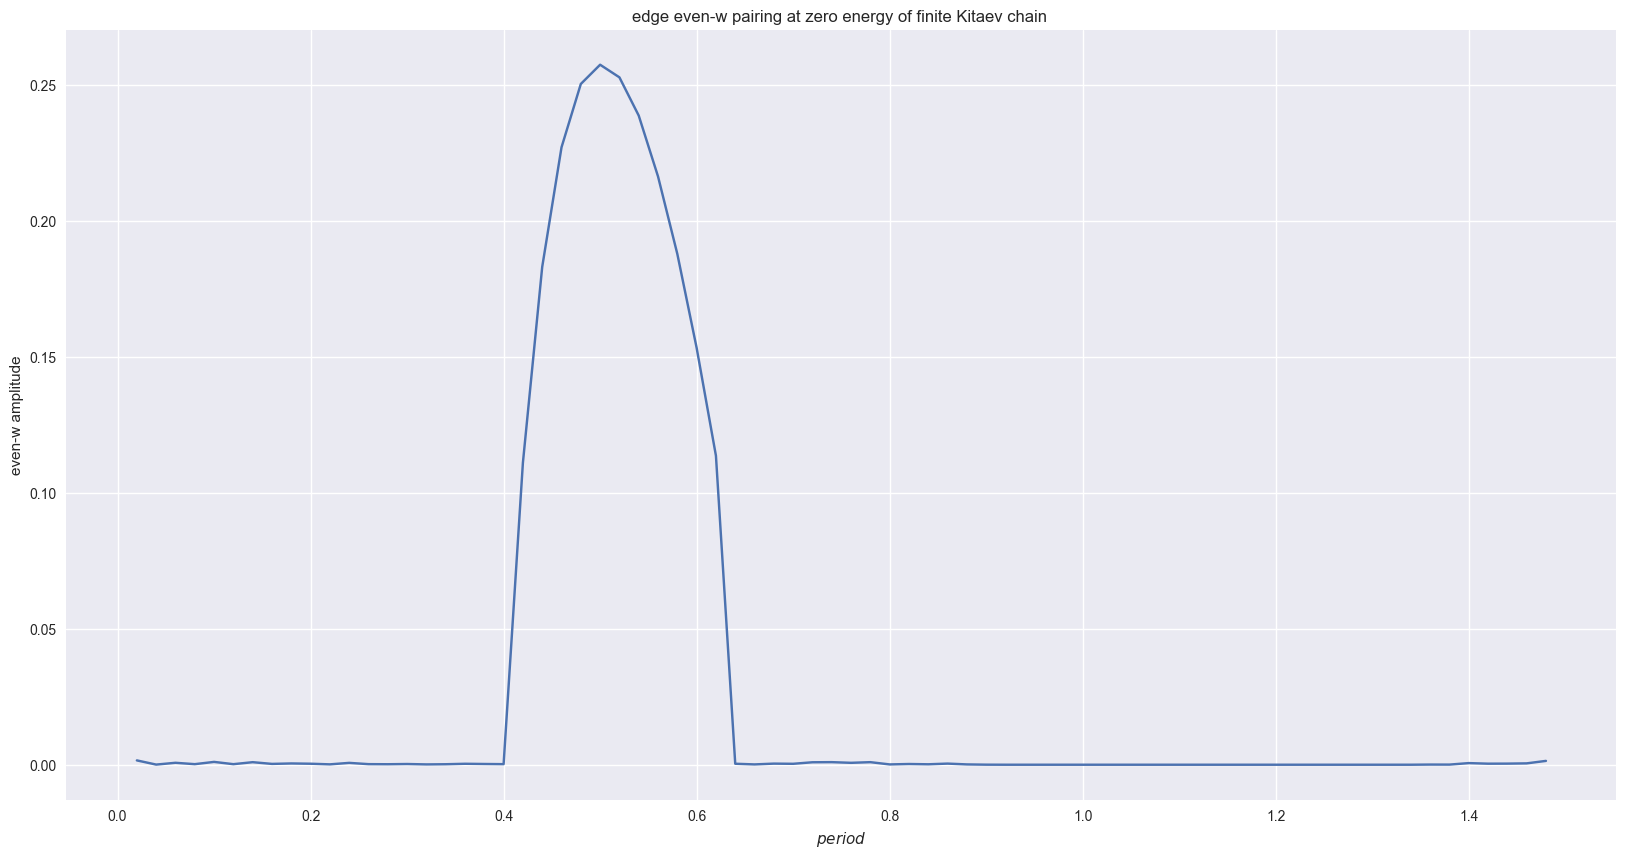

In [8]:
plt.title("edge even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,f_0_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


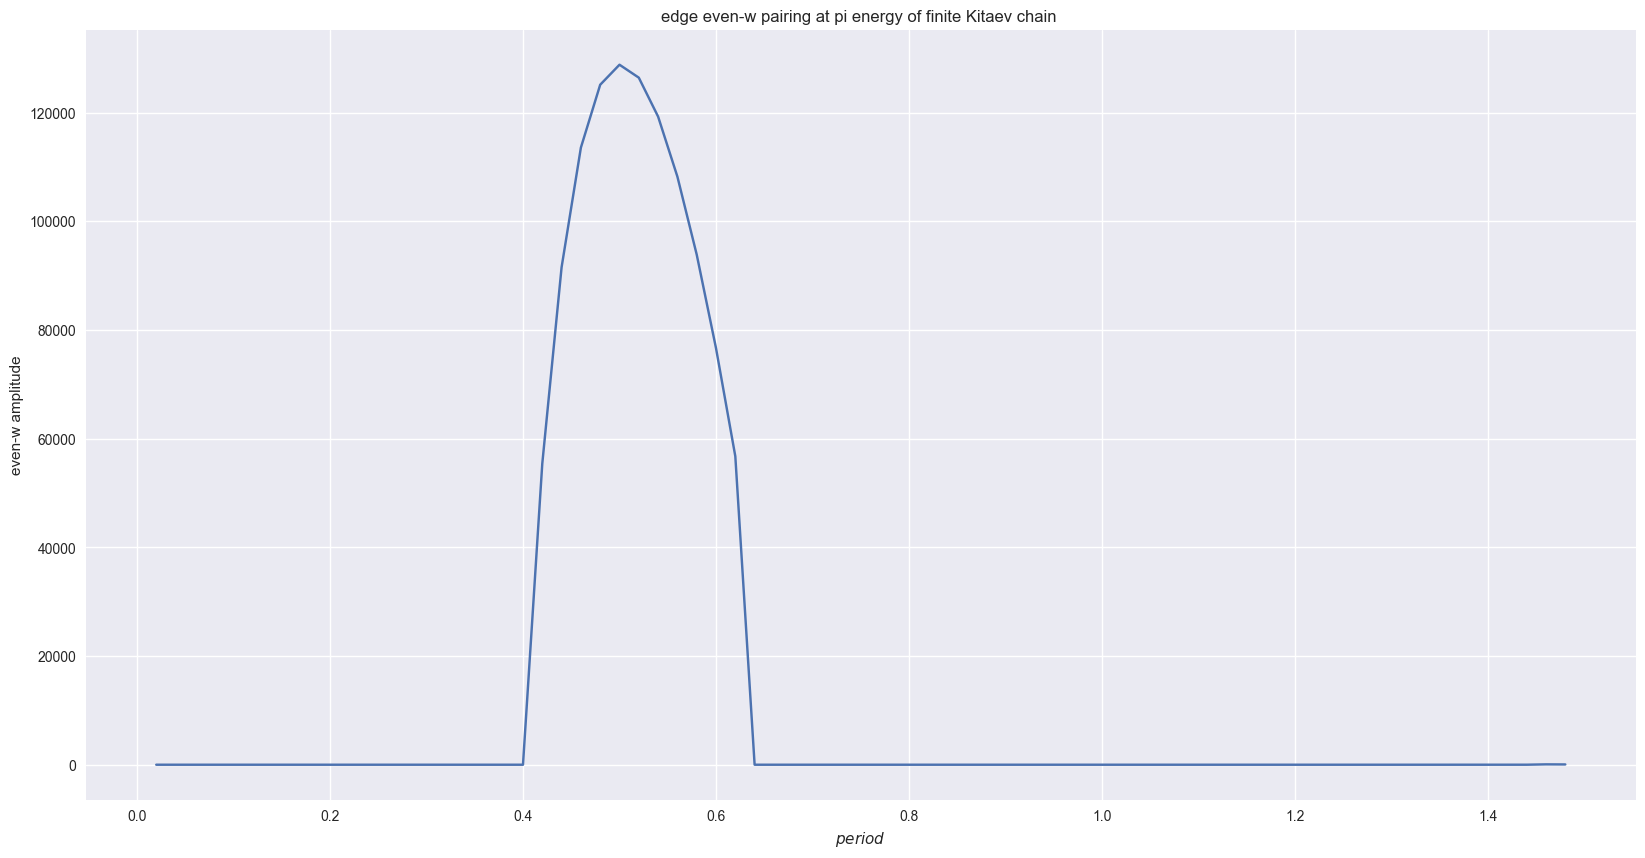

In [9]:
plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


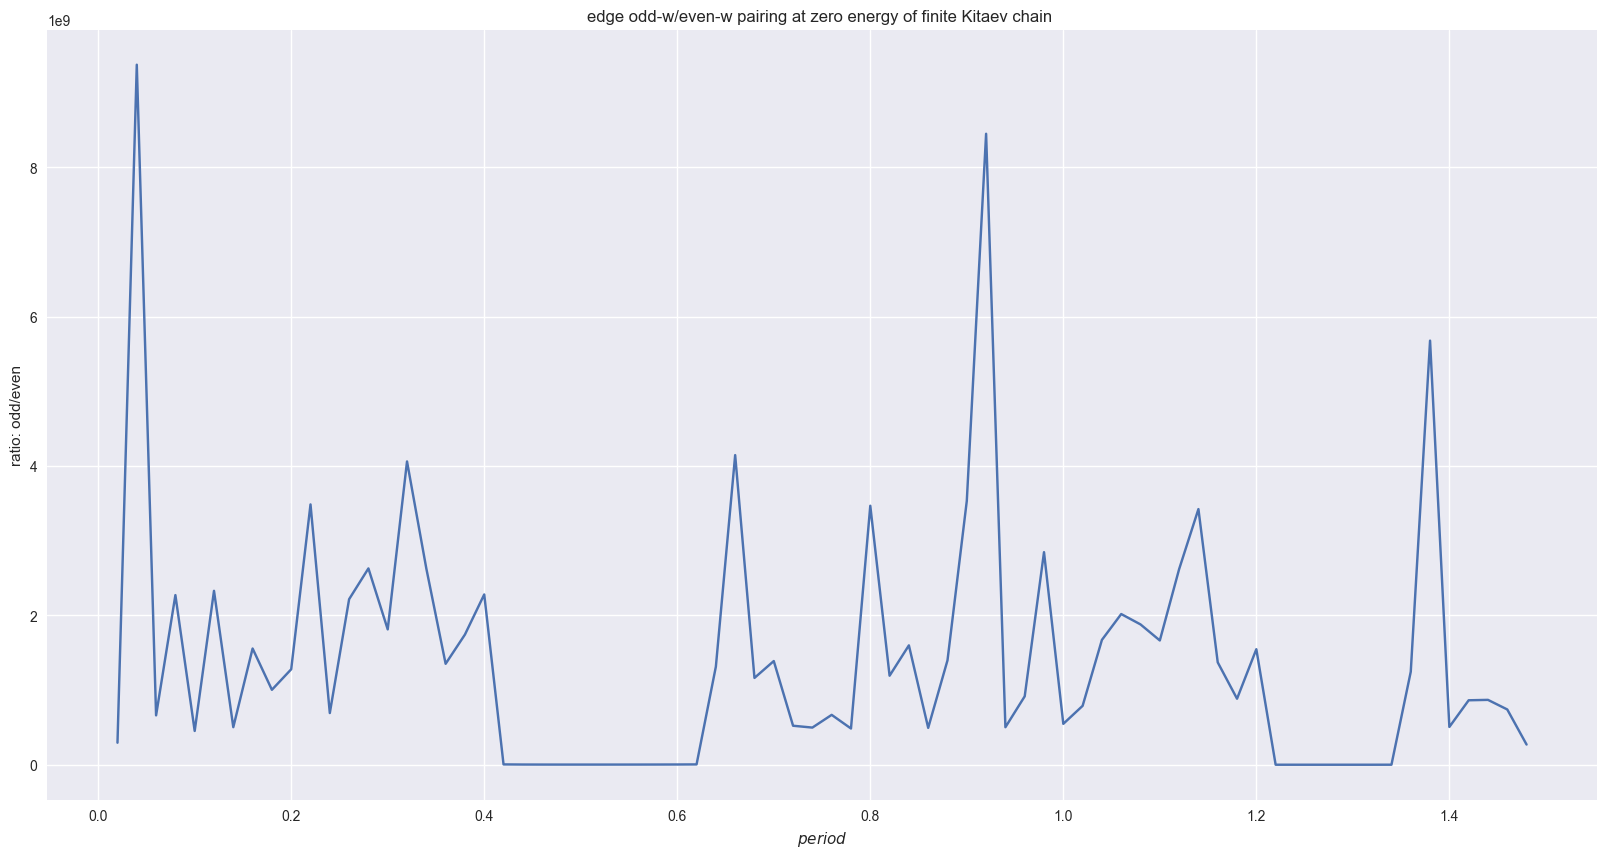

In [10]:
plt.title("edge odd-w/even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,[f_0_odd[i]/abs(f_0_even[i]) for i in range(len(f_0_odd))])


plt.ylabel('ratio: odd/even')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


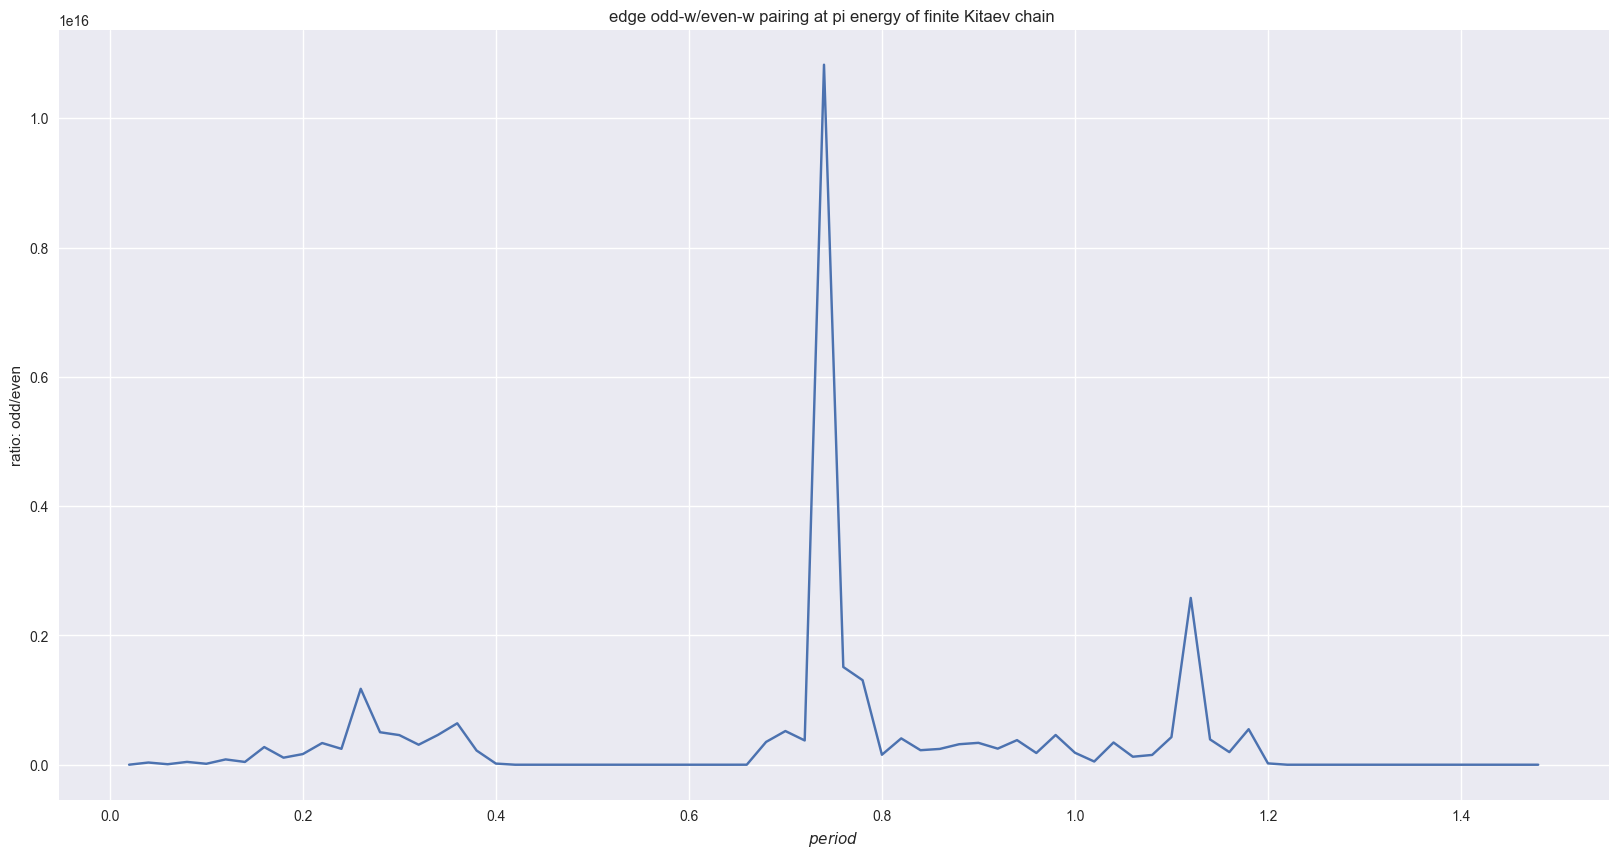

In [11]:
plt.title("edge odd-w/even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,[f_pi_odd[i]/f_pi_even[i] for i in range(len(f_0_odd))])


plt.ylabel('ratio: odd/even')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

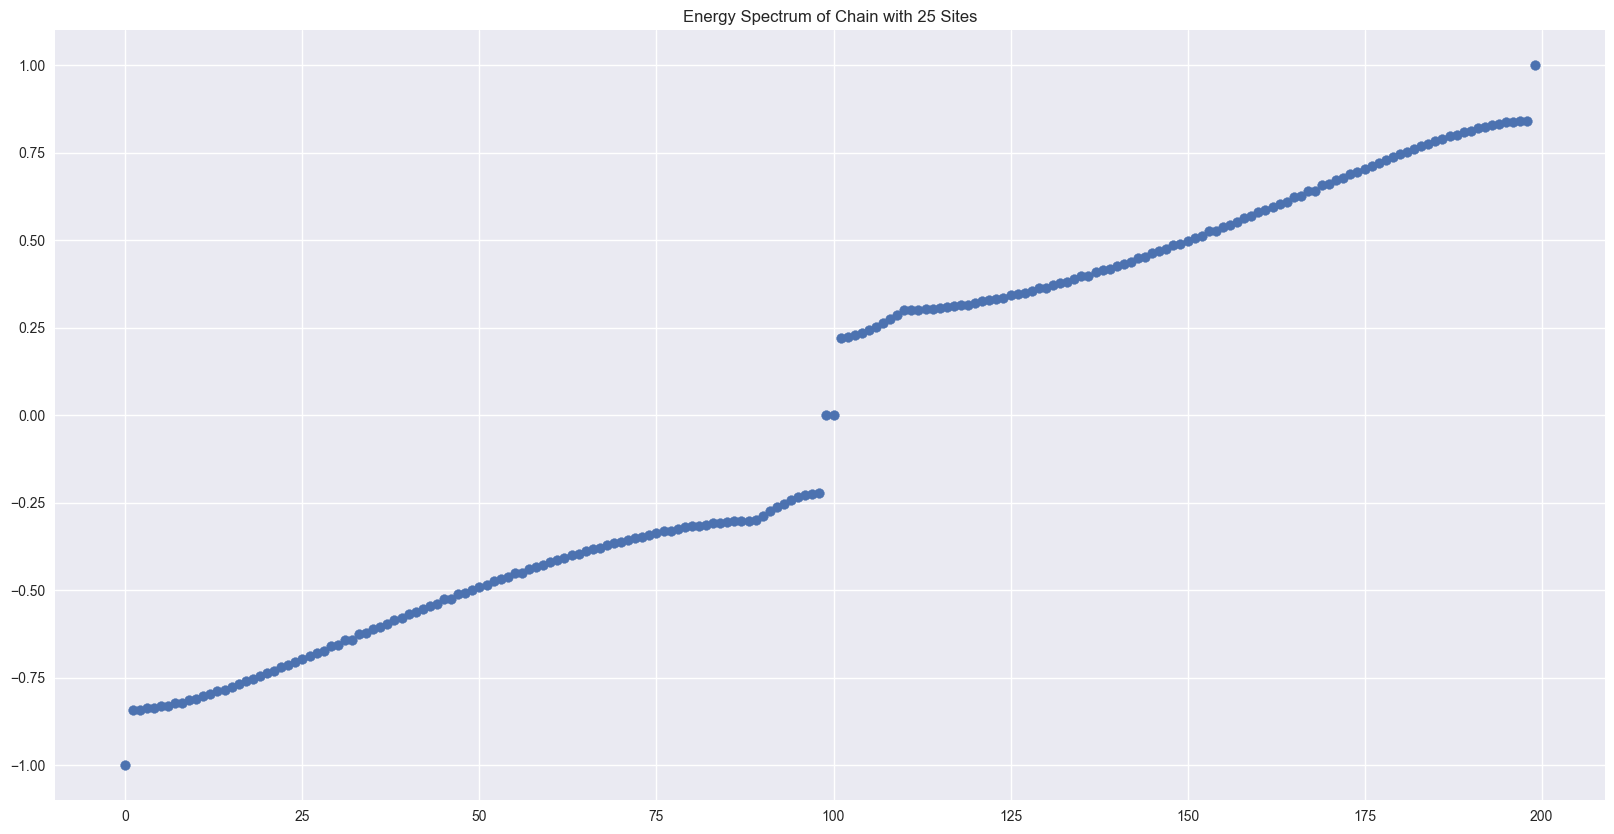

In [12]:
plot_spectrum(h_f)

In [13]:
N = 100
d =2
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
U = one_period_propagator([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)
d, V= np.linalg.eig(U)
np.isclose( np.diag(d) ,V.conj().T @ U @ V)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [14]:
N = 100
d =2
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
U = one_period_propagator([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)
eval, evec= la.eig(U)
h_f1 =evec @ np.diag(np.log(eval)*1j/np.pi) @ la.inv(evec)
#np.isclose( np.diag(d) ,V.conj().T @ U @ V)

In [15]:
h_f2 = floquet_hamiltonian([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)

In [16]:
np.testing.assert_allclose(h_f1,h_f2,atol=1e-8,rtol=1e-5)


In [17]:
np.isclose(h_f1,h_f2)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])